In [188]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [189]:
# loading the dataset
dataset = pd.read_csv("system temperature Dataset.csv")
dataset.head()

,CPU Total,CPU Package Temperature,Memory,Used Memory,Temperature,Used Space
0,3.528023,40,48.994663,1.918564,35,92.11886
1,5.060095,40,48.971184,1.917644,35,92.11886
2,10.937500,40,49.110200,1.923088,35,92.11886
3,5.078125,40,49.125004,1.923668,35,92.11886
4,2.343750,40,49.137670,1.924164,35,92.11886


In [190]:
# removing cup temp from dataset
dataset.dtypes

CPU Total                  float64
CPU Package Temperature      int64
Memory                     float64
Used Memory                float64
Temperature                  int64
Used Space                 float64
dtype: object

In [191]:
ds = dataset.drop(columns="CPU Package Temperature")

In [192]:
ds.head()

,CPU Total,Memory,Used Memory,Temperature,Used Space
0,3.528023,48.994663,1.918564,35,92.11886
1,5.060095,48.971184,1.917644,35,92.11886
2,10.937500,49.110200,1.923088,35,92.11886
3,5.078125,49.125004,1.923668,35,92.11886
4,2.343750,49.137670,1.924164,35,92.11886


In [193]:
# including only one one feature
X1 = ds.iloc[:,[2]]
X1

,Used Memory
0,1.918564
1,1.917644
2,1.923088
3,1.923668
4,1.924164
...,...
2185,2.116657
2186,2.123074
2187,2.125252
2188,2.124252


In [194]:
data = pd.read_csv("system temperature Dataset.csv")
data

,CPU Total,CPU Package Temperature,Memory,Used Memory,Temperature,Used Space
0,3.528023,40,48.994663,1.918564,35,92.11886
1,5.060095,40,48.971184,1.917644,35,92.11886
2,10.937500,40,49.110200,1.923088,35,92.11886
3,5.078125,40,49.125004,1.923668,35,92.11886
4,2.343750,40,49.137670,1.924164,35,92.11886
...,...,...,...,...,...,...
2185,8.203125,48,54.053402,2.116657,42,92.13370
2186,23.437500,48,54.217260,2.123074,42,92.13370
2187,17.968750,48,54.272884,2.125252,42,92.13370
2188,11.742425,48,54.247360,2.124252,42,92.13370


In [195]:
# output feature
Y = ds.iloc[:,1].values
print("Memory",Y)

Memory [48.9946632 48.9711838 49.1102    ... 54.2728844 54.24736   54.24132  ]


In [196]:
# splitting
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y,test_size=0.2, random_state=0)

In [198]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [199]:
polyreg = PolynomialFeatures(degree=4)

In [200]:
# Transform X in X_Pol which contains X, X squared, X cube, etc.
X_Poly = polyreg.fit_transform(X1)
regressor1 = LinearRegression()

In [201]:
# Fit X_Poly in our Linear Regression model
regressor1.fit(X_Poly,Y)

LinearRegression()

In [202]:
X1.shape

(2190, 1)

In [203]:
X_Poly.shape

(2190, 5)

In [204]:
# Predicting a new result
y_predict = regressor1.predict(X_Poly)
print(y_predict)


[48.99466169 48.97118436 49.11019764 ... 54.27288312 54.24736001
 54.24132022]


In [205]:
# mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,y_predict)
print(mse)


5.502856723989399e-12


In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1,Y)

LinearRegression()

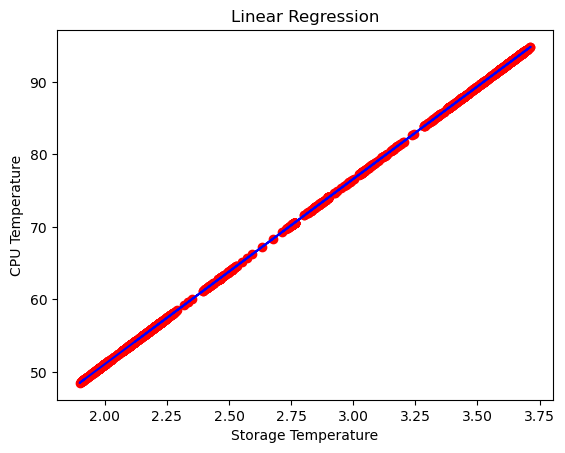

In [207]:
# Visualizing Linear Regression Results
plt.scatter(X1,Y,color="red")
plt.plot(X1,regressor.predict(X1),color = "blue")
plt.title("Linear Regression")
plt.xlabel("Storage Temperature")
plt.ylabel("CPU Temperature")
plt.show()

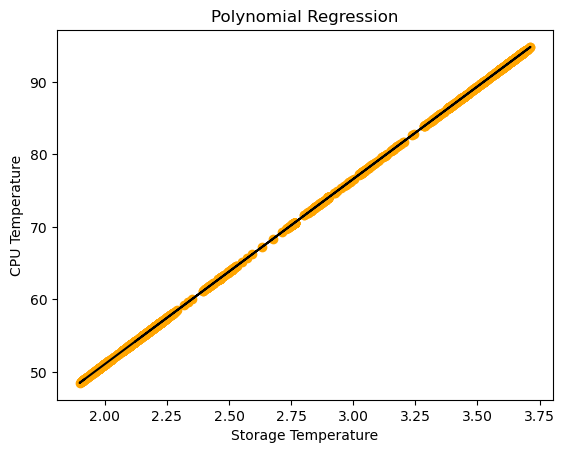

In [210]:
# Visualizing the Polynomial Regression Results
plt.scatter(X1,Y,color="orange")
plt.plot(X1,regressor1.predict(polyreg.fit_transform(X1)),color = "black")
plt.title("Polynomial Regression")
plt.xlabel("Storage Temperature")
plt.ylabel("CPU Temperature")
plt.show()
